In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import measureOC

In [40]:
nullCurrent = pd.read_csv('Data/motor_correction2/100rpm_nullCurrent.csv')

nullCurrent = pd.concat([nullCurrent, pd.read_csv('Data/motor_correction2/500rpm_nullCurrent.csv')])

nullCurrent = pd.concat([nullCurrent, pd.read_csv('Data/motor_correction2/800rpm_nullCurrent.csv')])

We have id = iq = 0, so
Ud = 0
Uq = omega*Lm*Ir = omega*Phi_rm

In [41]:
#omega_e: 20, 104, 167

phi_rm = pd.DataFrame(columns=['omega_e', 'phi_rm'])

nullCurrent_20 = nullCurrent[(nullCurrent['omega_e'] < 25.0) & (nullCurrent['omega_e'] > 15.0)]
phi_rm_20 = nullCurrent_20['Uq*'].mean()/nullCurrent_20['omega_e'].mean()

nullCurrent_104 = nullCurrent[(nullCurrent['omega_e'] < 110.0) & (nullCurrent['omega_e'] > 100.0)]
phi_rm_104 = nullCurrent_104['Uq*'].mean()/nullCurrent_104['omega_e'].mean()

nullCurrent_167 = nullCurrent[(nullCurrent['omega_e'] < 175.0) & (nullCurrent['omega_e'] > 160.0)]
phi_rm_167 = nullCurrent_167['Uq*'].mean()/nullCurrent_167['omega_e'].mean()
print(phi_rm_167/4.5)

phi_rm = pd.concat([phi_rm, pd.DataFrame([[20, phi_rm_20]], columns=['omega_e', 'phi_rm'])])
phi_rm = pd.concat([phi_rm, pd.DataFrame([[104, phi_rm_104]], columns=['omega_e', 'phi_rm'])])
phi_rm = pd.concat([phi_rm, pd.DataFrame([[167, phi_rm_167]], columns=['omega_e', 'phi_rm'])])

display(phi_rm)
phi_rm_mean = phi_rm['phi_rm'].mean()
print(phi_rm_mean)

0.26852611332670523


/var/folders/2f/7b8hf27x4j3bt73xqs0kvtch0000gn/T/ipykernel_51403/2822547637.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  phi_rm = pd.concat([phi_rm, pd.DataFrame([[20, phi_rm_20]], columns=['omega_e', 'phi_rm'])])


,omega_e,phi_rm
0,20,1.228863
0,104,1.245514
0,167,1.208368


1.227581294759075


In [42]:
control_iq = pd.read_csv('Data/motor_correction2/100rpm_iq.csv') #100rpm, 500rpm, 800rpm can be selectionned
control_id = pd.read_csv('Data/motor_correction2/100rpm_id.csv') #100rpm, 500rpm, 800rpm can be selectionned

display(control_iq.head())
display(control_id.head())

,Time,Duty 1,Duty 2,Duty 3,I1,I2,I3,V delta,Vdc,Ud*,Uq*,Id,Iq,omega_e,theta_e
0,0.00,0.548501,0.451498,0.514727,0.753885,-1.218601,0.000004,18.164062,576.855469,0.196607,32.798737,-0.037181,1.148701,20.828325,-2.261947
1,0.01,0.552950,0.447050,0.494233,0.712578,-0.929440,-0.134249,18.554688,577.246094,-0.924690,35.350998,0.017538,0.948013,20.200525,-2.057743
2,0.02,0.547579,0.452421,0.475024,0.960428,-0.908785,-0.320137,18.457031,577.050781,-1.664814,33.084999,0.036907,1.102944,20.734018,-1.850398
3,0.03,0.545225,0.454775,0.459703,0.939774,-0.691916,-0.578316,18.945312,576.953125,-0.699461,33.874962,-0.007078,1.051949,20.828325,-1.639911
4,0.04,0.549579,0.469669,0.450421,0.826176,-0.506027,-0.671261,17.968750,577.246094,-1.715849,35.005383,0.032501,0.947468,20.640688,-1.435708


,Time,Duty 1,Duty 2,Duty 3,I1,I2,I3,V delta,Vdc,Ud*,Uq*,Id,Iq,omega_e,theta_e
0,0.00,0.455405,0.544595,0.484884,0.185894,0.506035,-1.084347,17.773438,578.320312,11.804223,27.954424,0.971183,-0.014407,21.068438,-5.029690
1,0.01,0.452932,0.547068,0.501981,0.082623,0.588652,-1.053366,17.382812,578.515625,12.029656,29.059790,0.965003,-0.107720,21.066727,-4.819203
2,0.02,0.458031,0.541969,0.520761,-0.268501,0.846830,-0.950094,17.675781,578.417969,9.970876,27.393845,1.046847,0.036440,21.028898,-4.608716
3,0.03,0.458357,0.541643,0.537917,-0.320137,0.867485,-0.857149,17.285156,578.417969,10.978288,29.442263,1.013677,-0.104623,21.362823,-4.395088
4,0.04,0.459498,0.529507,0.540502,-0.702244,0.836502,-0.598972,17.285156,578.515625,11.408663,27.044161,0.991469,0.058586,20.736221,-4.187743


In [43]:
print("Id control value:")
id_mean_id = control_id['Id'].mean()
iq_mean_id = control_id['Iq'].mean()
print("Id_mean: ", id_mean_id)
print("Iq_mean: ", iq_mean_id)
ud_mean_id = control_id['Ud*'].mean()
uq_mean_id = control_id['Uq*'].mean()
print("Ud_mean: ", ud_mean_id)
print("Uq_mean: ", uq_mean_id)

print("-------")

print("Iq control value:")
id_mean_iq = control_iq['Id'].mean()
iq_mean_iq = control_iq['Iq'].mean()
print("Id_mean: ", id_mean_iq)
print("Iq_mean: ", iq_mean_iq)
ud_mean_iq = control_iq['Ud*'].mean()
uq_mean_iq = control_iq['Uq*'].mean()
print("Ud_mean: ", ud_mean_iq)
print("Uq_mean: ", uq_mean_iq)

Id control value:
Id_mean:  0.9988104833496941
Iq_mean:  0.0029099459018282164
Ud_mean:  11.321187478524667
Uq_mean:  27.12319684911657
-------
Iq control value:
Id_mean:  0.0013080557066671257
Iq_mean:  1.0009126398298476
Ud_mean:  -1.393527611538216
Uq_mean:  34.94614495171441


In [44]:
w_id = control_id['omega_e'].mean()
w_iq = control_iq['omega_e'].mean()
print("w_id: ", w_id)
print("w_iq: ", w_iq)

Lq = -ud_mean_iq/w_iq/iq_mean_iq
print("Lq: ", Lq)

Ld = (uq_mean_id-w_id*phi_rm_mean)/w_id/id_mean_id
print("Ld: ", Ld)

w_id:  20.930311344288015
w_iq:  20.91824206599483
Lq:  0.06655707386740749
Ld:  0.06838123955285574


For 100rpm:
Lq:  0.0666
Ld:  0.0684

For 500rpm:
Lq:  0.0593
Ld:  0.0293

For 800rpm:
Lq:  0.0574
Ld:  0.0402

We take 

Lq = 0.060
Ld = 0.035

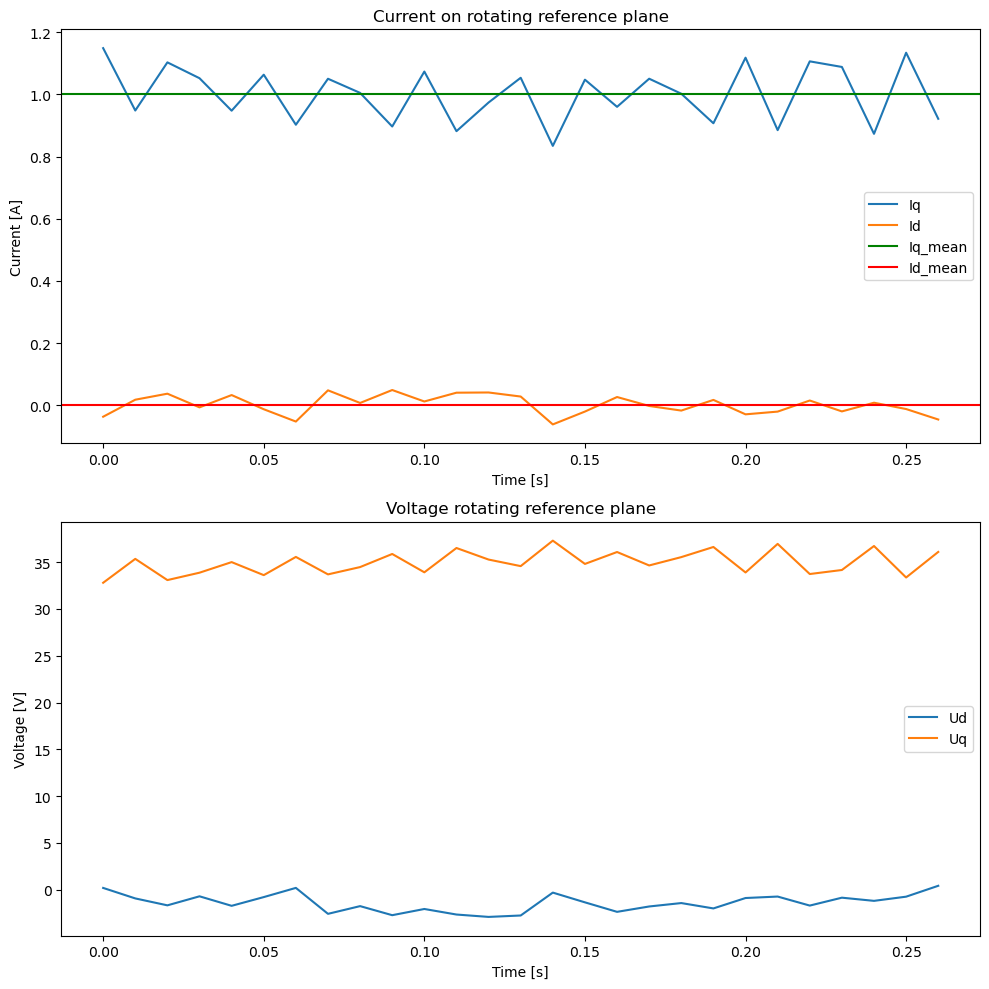

In [45]:
#plot in subplot 2x1 size of 10x10
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ax1.plot(control_iq['Time'], control_iq['Iq'])
ax1.plot(control_iq['Time'], control_iq['Id'])
ax1.set_title('Current on rotating reference plane')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Current [A]')

#plot on ax1 control_iq['Iq] and control_iq['Id'] mean
ax1.axhline(y=iq_mean_iq, color='g', linestyle='-')
ax1.axhline(y=id_mean_iq, color='r', linestyle='-')


ax1.legend(['Iq', 'Id', 'Iq_mean', 'Id_mean'])


ax2.plot(control_iq['Time'], control_iq['Ud*'])
ax2.plot(control_iq['Time'], control_iq['Uq*'])
ax2.set_title('Voltage rotating reference plane')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Voltage [V]')
ax2.legend(['Ud', 'Uq'])

fig.tight_layout()